In [2]:
import numpy as np

In [3]:
import pandas as pd

In [6]:
message = pd.read_csv("C:\\Users\\Mahesh\\Downloads\\archive (1) spam\\spam_ham_dataset.csv")
message.head()

,Unnamed: 0,labels,message,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


#  Exploratory Data Analysis

In [7]:
message.describe()

,Unnamed: 0,length
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [8]:
message.groupby('labels').describe()

Unnamed: 0                                                         \
            count    mean          std     min      25%     50%      75%   
labels                                                                     
ham        3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25   
spam       1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

                length                                     
           max   count mean  std  min  25%  50%  75%  max  
labels                                                     
ham     3671.0  3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam    5170.0  1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [9]:
message['length']=message['message'].apply(len)
message.head()

,Unnamed: 0,labels,message,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,336


In [10]:
message.tail()

,Unnamed: 0,labels,message,length
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,534
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,402
5169,1409,ham,Subject: industrial worksheets for august 2000...,573
5170,4807,spam,Subject: important online banking alert\r\ndea...,1114


# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

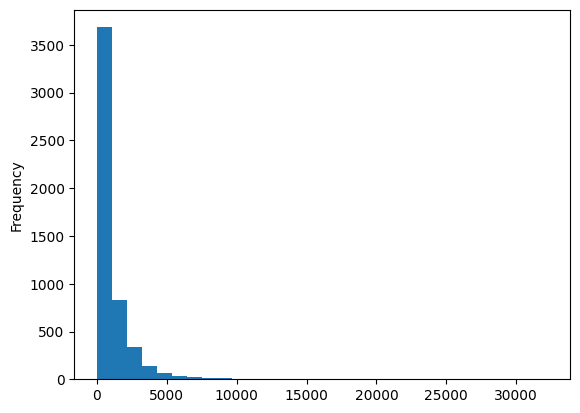

In [12]:
message['length'].plot(bins=30, kind='hist')

In [13]:
message.length.describe()

count     5171.000000
mean      1048.391994
std       1528.513435
min         11.000000
25%        244.000000
50%        540.000000
75%       1237.000000
max      32258.000000
Name: length, dtype: float64

In [16]:
message[message['length']== 32258]['message'].iloc[0]

'Subject: fw : " red , white and blue out "\r\n- - - - - original message - - - - -\r\nfrom : carter , rhonda [ mailto : rcarter @ cooperinst . org ]\r\nsent : friday , september 14 , 2001 12 : 33 pm\r\nto : \' al _ abbott @ compuserve . com \' ; \' mabner @ sprintmail . com \' ;\r\n\' aggiebob @ hotmail . com \' ; \' adamsck @ flash . net \' ; \' gadams @ promus . com \' ;\r\n\' pjadell @ yahoo . com \' ; \' bob @ cybersitebuilders . com \' ;\r\n\' worml 998 @ hotmail . com \' ; \' janie . beth @ prodigy . net \' ; \' gakin @ mccarthy . com \' ;\r\n\' vja @ flash . net \' ; \' locke . alder @ gte . net \' ; \' calexaol @ 7 - 11 . com \' ;\r\n\' erika @ publish . no . irs . gov \' ; \' ali @ buz . net \' ; \' brada @ ticnet . com \' ;\r\n\' svallen @ aol . com \' ; \' jand 30 @ aol . com \' ; \' allan @ stratsolgroup . com \' ;\r\n\' chuck _ anderson @ oxy . com \' ; \' mdqsga 96 @ aol . com \' ;\r\n\' brian _ anhalt @ bigfoot . com \' ; \' aranda @ nbstx . com \' ; \' aggiemom @ arche

# Text Pre-processing

In [17]:
import string

mess = 'sample message!...'
nopunc = [char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [18]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
nopunc.split()

['sample', 'message']

In [20]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
clean_mess

['sample', 'message']

In [22]:
#Now let's put both of these together in a function to apply it to our DataFrame later on:

def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [23]:
# Here is the original DataFrame again:

message.head()

,Unnamed: 0,labels,message,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,336


# Now let's "tokenize" these messages.

In [24]:
message['message'].head(5).apply(text_process)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: message, dtype: object

In [25]:
message.head()

,Unnamed: 0,labels,message,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,336


# Vectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['message'])
print(len(bow_transformer.vocabulary_))

50381


In [28]:
message4=message['message'][3]
print(message4)


Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin



In [29]:
# Now let's see its vector representation:

bow4=bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4725)	1
  (0, 4761)	1
  (0, 4928)	1
  (0, 5533)	1
  (0, 8040)	1
  (0, 8422)	1
  (0, 9357)	1
  (0, 10877)	1
  (0, 11952)	1
  (0, 11982)	1
  (0, 12030)	1
  (0, 12215)	1
  (0, 12664)	1
  (0, 14970)	1
  (0, 15210)	1
  (0, 15237)	1
  (0, 16322)	1
  (0, 20824)	1
  (0, 21035)	1
  (0, 23435)	1
  (0, 25454)	1
  (0, 26352)	1
  (0, 28847)	1
  (0, 28973)	1
  (0, 29969)	1
  (0, 30082)	1
  (0, 33683)	1
  (0, 34217)	1
  (0, 34817)	1
  (0, 35633)	1
  (0, 36330)	1
  (0, 37245)	1
  (0, 37429)	1
  (0, 38082)	1
  (0, 39033)	1
  (0, 39744)	1
  (0, 41385)	1
  (0, 42157)	1
  (0, 42575)	1
  (0, 44360)	1
  (0, 45818)	1
  (0, 46549)	1
  (0, 46669)	1
  (0, 48732)	1
(1, 50381)


In [31]:
print(bow_transformer.get_feature_names_out()[4073])
print(bow_transformer.get_feature_names_out()[9570])


9080
bo


In [32]:
message_bow = bow_transformer.transform(message['message'])

In [33]:
print('Shape of Sparse Matrix: ',message_bow.shape)
print('Amount of non-zero occurences:',message_bow.nnz)

Shape of Sparse Matrix:  (5171, 50381)
Amount of non-zero occurences: 374350


In [34]:
sparsity =(100.0 * message_bow.nnz/(message_bow.shape[0]*message_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)


  (0, 48732)	0.09472899214522401
  (0, 46669)	0.16463637773713372
  (0, 46549)	0.16463637773713372
  (0, 45818)	0.15710021779224972
  (0, 44360)	0.16463637773713372
  (0, 42575)	0.151753227217924
  (0, 42157)	0.16463637773713372
  (0, 41385)	0.12486012923083871
  (0, 39744)	0.16463637773713372
  (0, 39033)	0.151753227217924
  (0, 38082)	0.14135195223463107
  (0, 37429)	0.12598692617950458
  (0, 37245)	0.16463637773713372
  (0, 36330)	0.16463637773713372
  (0, 35633)	0.10518437621291869
  (0, 34817)	0.16463637773713372
  (0, 34217)	0.16463637773713372
  (0, 33683)	0.07430968168113034
  (0, 30082)	0.11253183953843214
  (0, 29969)	0.10895632755749854
  (0, 28973)	0.16463637773713372
  (0, 28847)	0.16463637773713372
  (0, 26352)	0.16463637773713372
  (0, 25454)	0.16463637773713372
  (0, 23435)	0.15710021779224972
  (0, 21035)	0.15710021779224972
  (0, 20824)	0.16463637773713372
  (0, 16322)	0.15710021779224972
  (0, 15237)	0.16463637773713372
  (0, 15210)	0.151753227217924
  (0, 14970)	0.1

In [40]:
## We'll go ahead and check what is the IDF (inverse document frequency) of the word "u" and of word "university"?

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])


4.298741311845118
6.778426017651967


In [43]:
message_tfidf=tfidf_transformer.transform(message_bow)
print(message_tfidf.shape)

(5171, 50381)


#  Training a model -- Naive Bayes Classifier

In [44]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(message_tfidf,message['labels'])

In [45]:
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',message.labels[3])

predicted: spam
expected: spam


#  Model Evaluation

In [46]:
all_predictions = spam_detect_model.predict(message_tfidf)
print(all_predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(message['labels'],all_predictions))
print(confusion_matrix(message['labels'],all_predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      3672
        spam       1.00      0.88      0.94      1499

    accuracy                           0.97      5171
   macro avg       0.98      0.94      0.96      5171
weighted avg       0.97      0.97      0.97      5171

[[3670    2]
 [ 174 1325]]


# Train Test Split¶

In [49]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['message'],message['labels'],test_size=0.2)

In [50]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

4136 1035 4136 1035


# Creating a Data Pipeline 

In [51]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [52]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ED85B985E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [53]:
predictions = pipeline.predict(msg_test)

In [54]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.88      0.94       827
        spam       0.68      1.00      0.81       208

    accuracy                           0.90      1035
   macro avg       0.84      0.94      0.87      1035
weighted avg       0.93      0.90      0.91      1035

